By Akinde Kadjo

**Goal:** The goal of this project is to distinguish normal electrocardiogram (ECG) heartbeat signals from abnormal ones. The Dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/shayanfazeli/heartbeat/data). Its original source is [The PTB Diagnostic ECG Database](https://www.physionet.org/content/ptbdb/1.0.0/).

# Imports

In [32]:
#Importing all of the libraries that may be needed for the project
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import HTML

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
set_config(display='diagram')

from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             accuracy_score, precision_score, recall_score, 
                             balanced_accuracy_score,classification_report,
                             ConfusionMatrixDisplay,roc_auc_score,
                             PrecisionRecallDisplay, RocCurveDisplay,f1_score)

from xgboost import  XGBClassifier

import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, regularizers

from keras.optimizers import RMSprop, Adam

import lazypredict
from lazypredict.Supervised import LazyClassifier

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [4]:
#Loading the data
normal_df = pd.read_csv('ptbdb_normal.csv', header=None)
print(f'normal data shape: {normal_df.shape}')
abnormal_df = pd.read_csv('ptbdb_abnormal.csv', header=None)
print(f'abnormal data shape: {abnormal_df.shape}')

normal data shape: (4046, 188)
abnormal data shape: (10506, 188)


In [36]:
normal_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.00,0.90,0.36,0.05,0.05,0.13,0.13,0.12,0.11,0.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,0.79,0.38,0.12,0.00,0.17,0.28,0.29,0.33,0.35,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [37]:
abnormal_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.93,0.87,0.89,0.93,0.91,0.93,0.80,0.75,0.69,0.64,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,1.00,0.61,0.38,0.25,0.22,0.28,0.25,0.18,0.15,0.12,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


# Functions

In order to keep a clean notebook, I'm storing all of the functions that I've created in this section. These functions pertain to data extraction, data cleaning, plots, prediction models and regression outputs.

In [45]:
#function to animate through different plots
def anim_plot(dataframe,limit):
    df = dataframe.iloc[0:limit]
    fig, ax = plt.subplots()   
    def update(frame): # animation function      
        ax.clear()# Clear the axis
        # Plot the row at the current frame
        ax.plot(df.iloc[frame])
        ax.set_title(f"Row {frame}")
        ax.set_ylabel("Normalized signal")
    # Create the animation object
    ani = FuncAnimation(fig, update, frames=len(df), interval=1000)
    # Display the animation
    HTML(ani.to_jshtml())

# Visualization

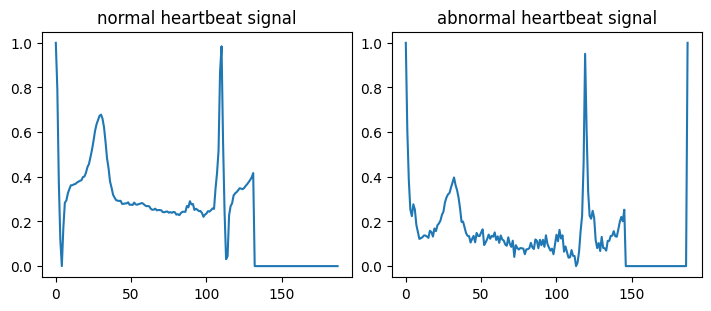

In [38]:
# A peek at both types of signals
fig, ax = plt.subplots(1,2,figsize = (7,3),constrained_layout=True)
ax[0].plot(normal_df.iloc[1])
ax[0].set_title('normal heartbeat signal') 
ax[1].plot(abnormal_df.iloc[1])
ax[1].set_title('abnormal heartbeat signal') 
plt.show()

In [48]:
df = normal_df.iloc[0:20]
#fig, ax = plt.subplots()
def update(frame):# animation function
    ax.clear()
    # Plot the row at the current frame
    ax.plot(df.iloc[frame])
    ax.set_title(f"Normal ECG # {frame}")
    ax.set_ylabel("Normalized signal")
# Create the animation object
ani = FuncAnimation(fig, update, frames=len(df), interval=1000)
# Display the animation
HTML(ani.to_jshtml())

In [49]:
df = abnormal_df.iloc[0:20]
#fig, ax = plt.subplots()
def update(frame):# animation function
    ax.clear()
    # Plot the row at the current frame
    ax.plot(df.iloc[frame])
    ax.set_title(f"Abnormal ECG # {frame}")
    ax.set_ylabel("Normalized signal")
# Create the animation object
ani = FuncAnimation(fig, update, frames=len(df), interval=1000)
# Display the animation
HTML(ani.to_jshtml())

# Data Cleaning

The dataset is already normalized, cut and padded. So very little cleaning is needed.

# Machine Learning

# 1D CNN model